### Removing Periodic Noise with Notch Filter

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()
C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:33: ComplexWarning: Casting complex values to real discards the imaginary part


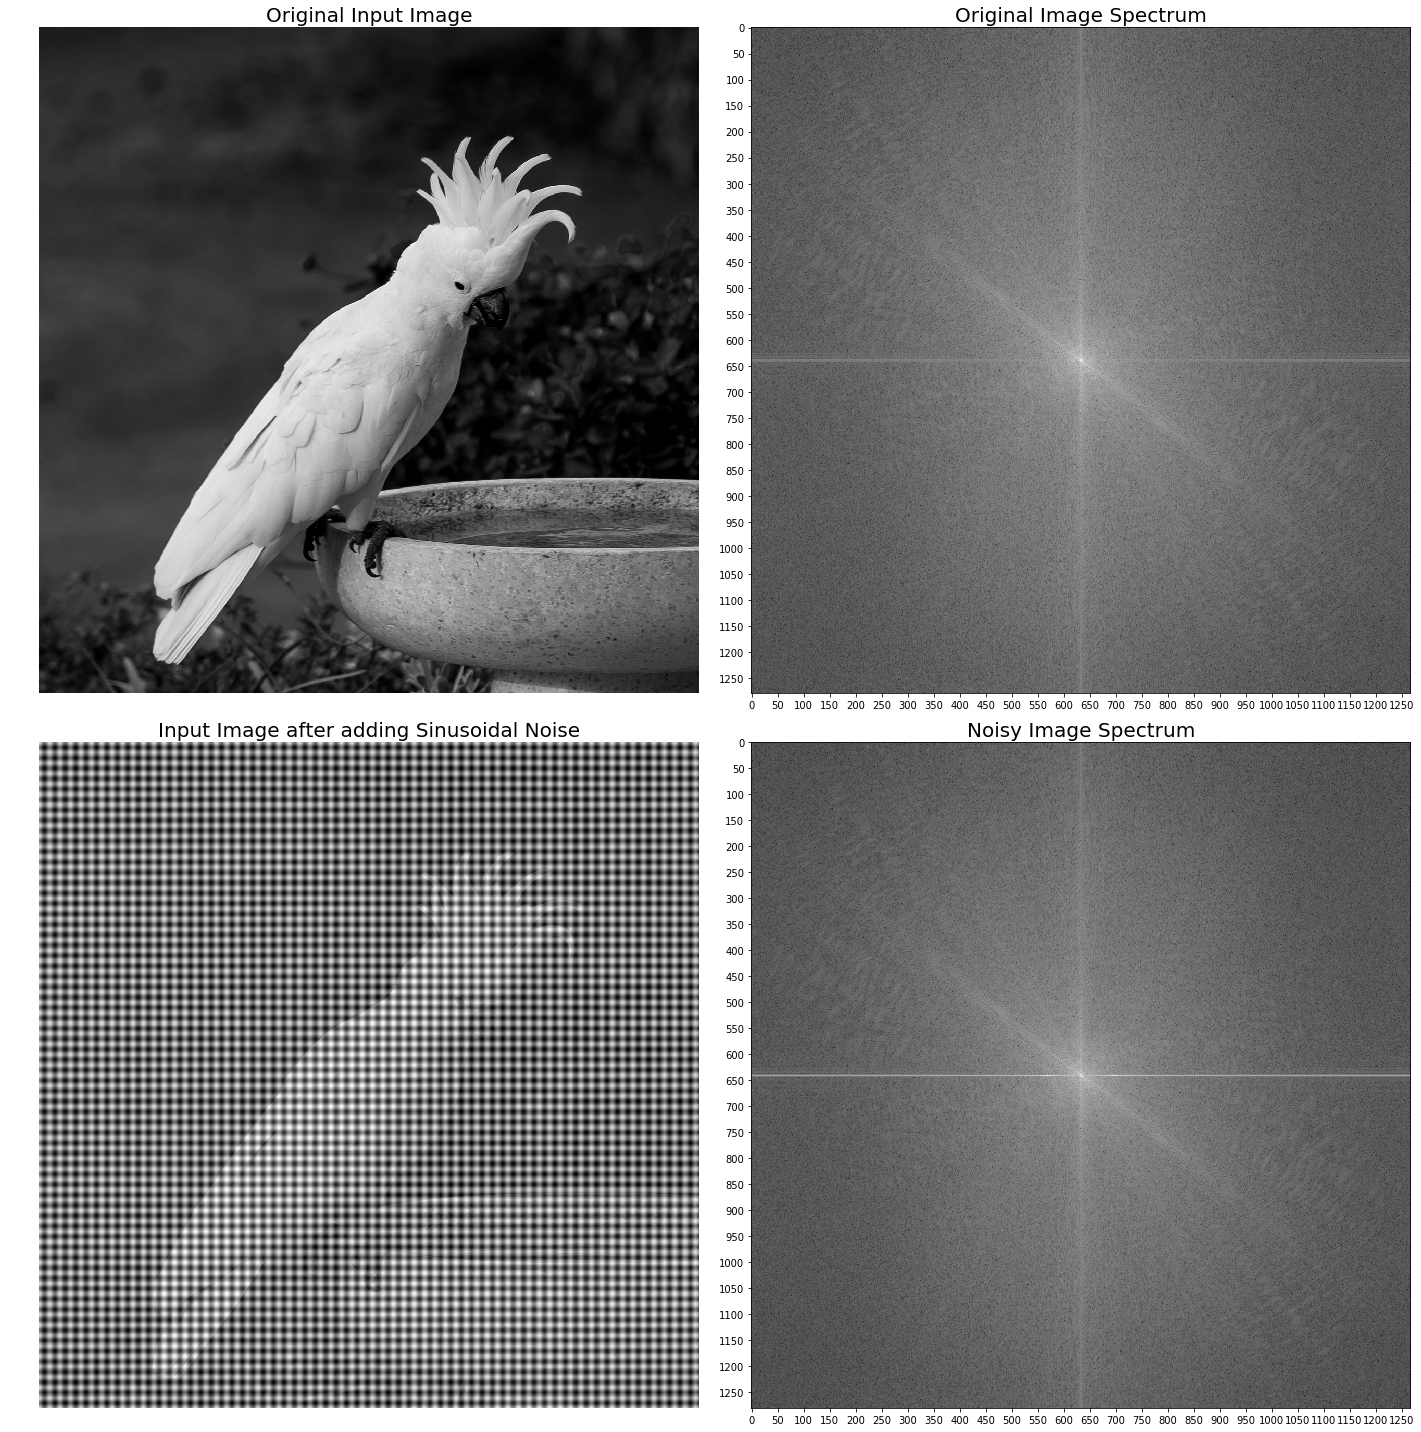

In [39]:
from skimage.io import imread
from skimage.color import rgb2gray
import numpy.fft as fp

im = rgb2gray(imread("images/bird.jpg"))

plt.figure(figsize=(20,20))

plt.subplot(2,2,1) 
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.title('Original Input Image', size=20)
F1 = fp.fft2((im).astype(float))
F2 = fp.fftshift( F1 )
plt.subplot(2,2,2) 
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
plt.xticks(np.arange(0, im.shape[1], 50))
plt.yticks(np.arange(0, im.shape[0], 50))
plt.title('Original Image Spectrum', size=20)

for n in range(im.shape[0]):
    im[n, :] += np.cos(0.1*np.pi*n)
for n in range(im.shape[1]):
    im[:, n] += np.cos(0.1*np.pi*n)
    
plt.subplot(2,2,3) 
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.title('Input Image after adding Sinusoidal Noise', size=20)
F1 = fp.fft2((im).astype(float))
F2 = fp.fftshift( F1 )
plt.subplot(2,2,4) 
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
plt.xticks(np.arange(0, im.shape[1], 50))
plt.yticks(np.arange(0, im.shape[0], 50))
plt.title('Noisy Image Spectrum', size=20)
plt.tight_layout()
plt.show()

C:\Users\Sandipan.Dey\Anaconda\envs\ana41py35\lib\site-packages\ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


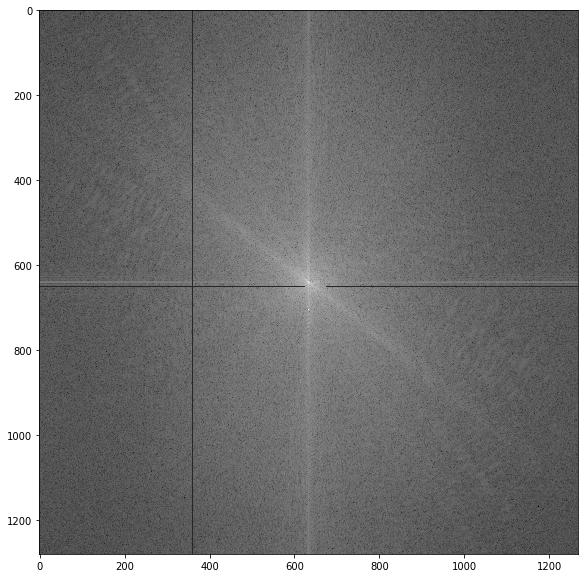

5.908956642425741 -1.0


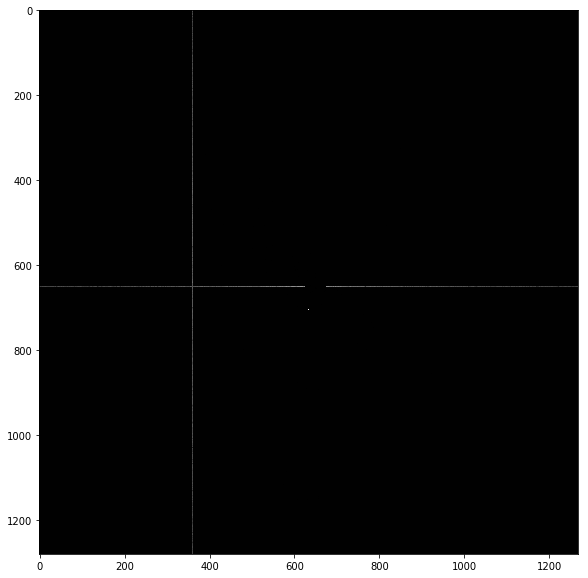

(array([   0,    0,    1, ..., 1278, 1279, 1279], dtype=int64), array([360, 650, 360, ..., 650, 360, 650], dtype=int64))


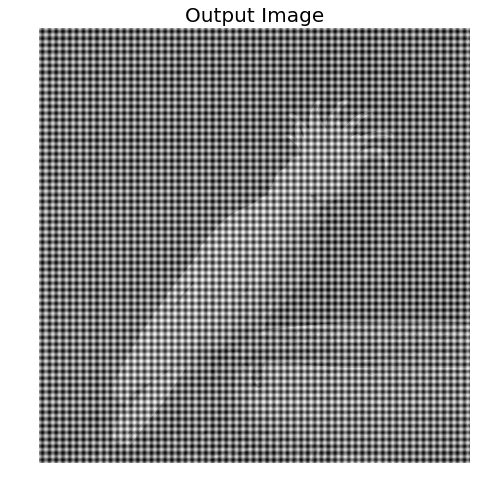

In [51]:
im =  rgb2gray(imread("images/bird.jpg"))
F1o = fp.fft2((im).astype(float))
F2o = fp.fftshift( F1o )
plt.figure(figsize=(10,10))
plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)
plt.show()
plt.figure(figsize=(10,10))
print(np.max(np.log10( 0.1 + np.abs(F2-F2o))), np.min(np.log10( 0.1 + np.abs(F2-F2o))))
plt.imshow( (20*np.log10( 0.1 + np.abs(F2-F2o))).astype(int), cmap=plt.cm.gray)
plt.show()
print(np.where(abs(F2-F2o) > 0.05))
F2[:,360] = F2[:,360] = 0
F2[650,:] = F2[650,:] = 0
F1b = fp.ifftshift( F2 )
im1 =  fp.ifft2(F1b).real #np.abs()
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(im1, cmap='gray')
plt.title('Output Image', size=20)
plt.show()

### Fake Miniature

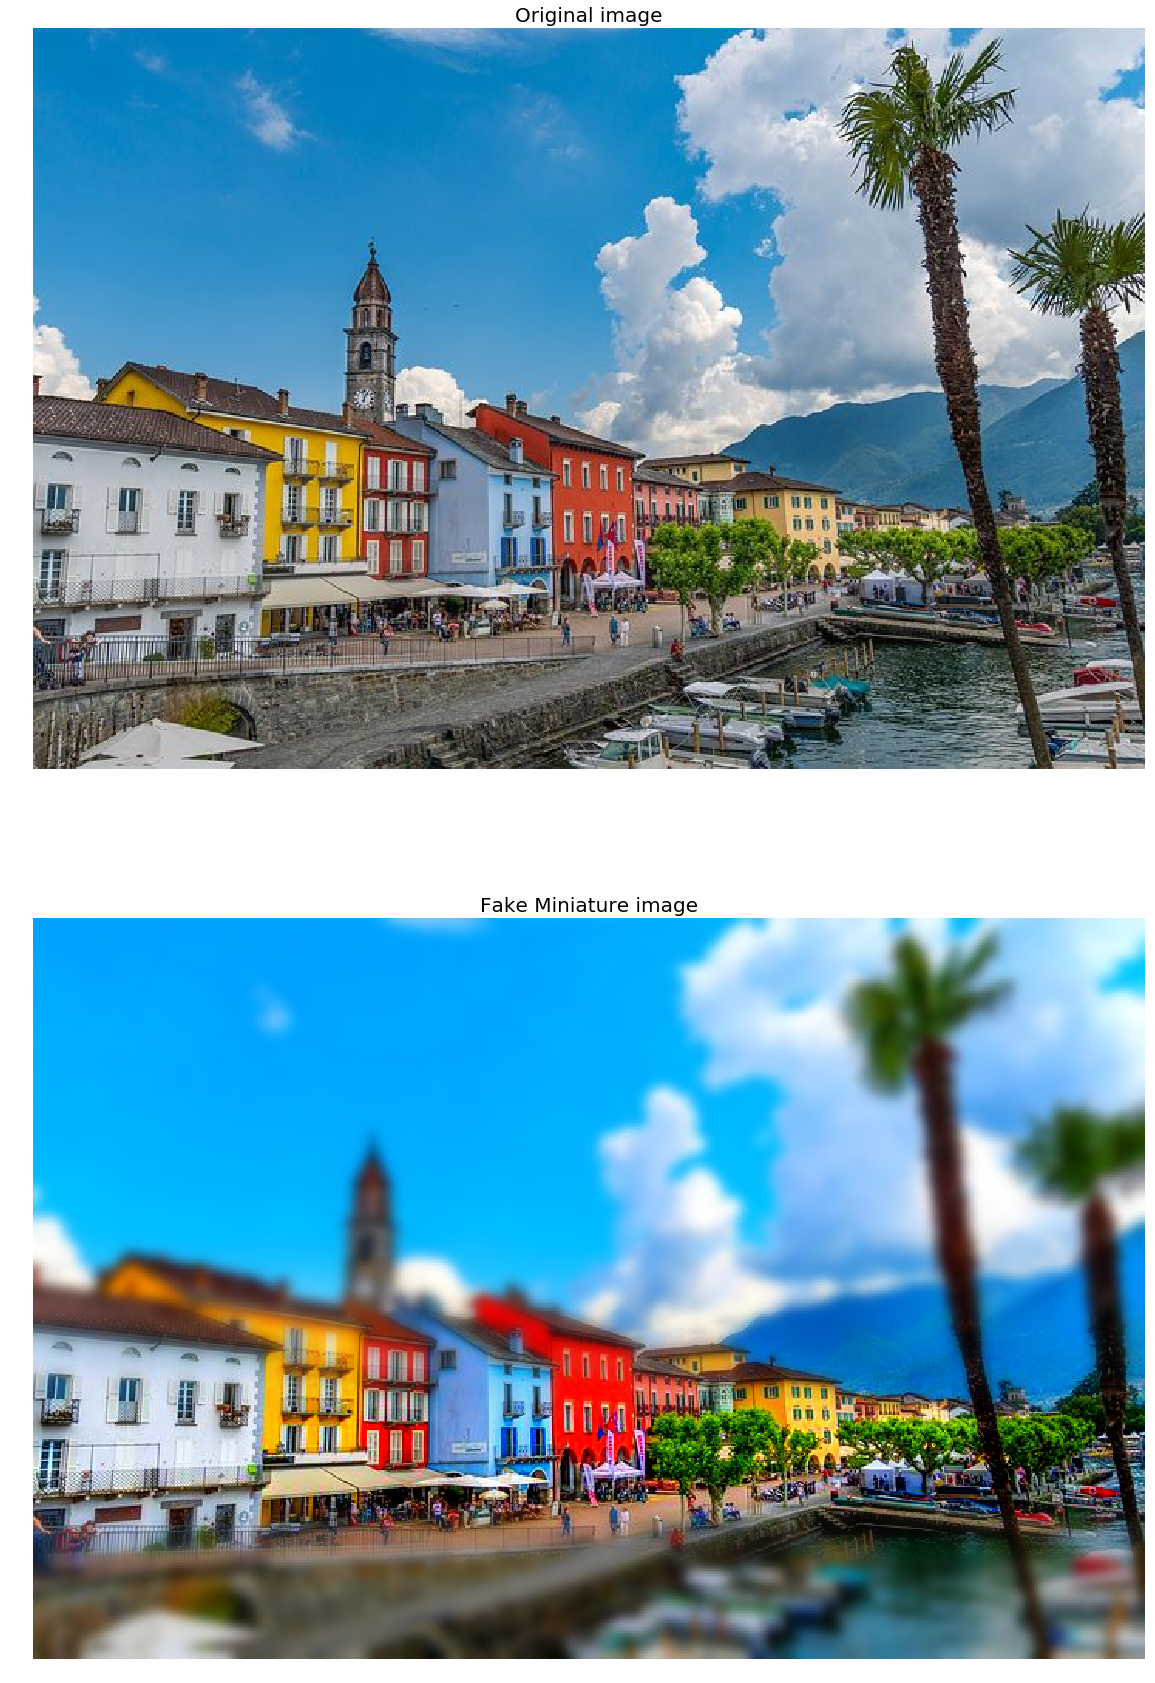

In [29]:
% matplotlib inline
from pylab import arange, plot, sin, ginput, show
from PIL import Image, ImageEnhance, ImageDraw, ImageOps, ImageFilter
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt, matplotlib, sys, numpy as np, math, scipy
from skimage.restoration import denoise_bilateral

MASK_WIDTH, MASK_HEIGHT = 640, 480

def create_fake_miniature(im, pts, custom_mask=None, dof=40, color=1.9, contrast=1.4, offset_focus=9):
    # Cranking up the contrast and color
    edited = ImageEnhance.Contrast(ImageEnhance.Color(im).enhance(color)).enhance(contrast)
    # Determining whether we want a focal line mask or a custom mask (bells and whistles)
    if not custom_mask:
        # Creating the mask for a focal line

        offset = int(pts[0][1] / im.size[1] * MASK_HEIGHT)
        #print(pts[0][1], im.size[1], MASK_HEIGHT, offset) 
        va = int(offset + 81.6)
        focus = int(va + offset_focus * 4.8)
        vb = int(focus + 43.2)
        #print(va, vb)
        
        mask, m1 = Image.new('L', (MASK_WIDTH, MASK_HEIGHT)), Image.new('L', (1, MASK_HEIGHT))
        d1 = ImageDraw.Draw(m1)
        for i in range (0, offset):
            d1.point((0, i), 255)
        for i in range (offset, va):
            d1.point((0, i), int((va - i) * (255 / (va - offset))))
        for i in range (va, focus):
            d1.point((0, i), 0)
        for i in range (focus, vb):
            d1.point((0, i), int(255 - (vb - i) * (255 / (vb - focus))))
        for i in range (vb, MASK_HEIGHT):
            d1.point((0, i), 255)
        mt = ImageOps.invert(ImageOps.invert(m1.resize((int(mask.size[0] * 3), mask.size[1]), Image.ANTIALIAS)).rotate(0, Image.NEAREST, 1))
        mask.convert("RGBA")
        mask.paste(mt,(-mt.size[0] // 2, -(mt.size[1] // 2 - MASK_HEIGHT // 2)))
        mask.convert("L")
        mask = mask.resize(edited.size)
    else:
        # hello from the other side
        #mask = custom_mask.convert("1")
        lol = Image.fromarray(np.uint8(gaussian_filter(np.array(custom_mask, dtype=float), sigma=[3, 3, 0])))
        mask = lol.convert("1")
        # mask = mask.point(lambda i:i*(1./256)).convert('L') #.filter(ImageFilter.SMOOTH)
        #return lol

    # Blurring the image and merging
    if custom_mask:
        im_blur = Image.fromarray(np.uint8(gaussian_filter(np.array(edited, dtype=float), sigma=[1, 1, 0])))
    else:
        im_blur = Image.fromarray(np.uint8(gaussian_filter(np.array(edited, dtype=float), sigma=[4, 4, 0])))
    edited = edited.convert("RGBA")
    edited.paste(im_blur, mask=mask)

    return edited

im = Image.open("images/ascona.jpg")
#mask = Image.open("images/min_mask.jpg")
out = create_fake_miniature(im, [[50, 250]]) #, mask)
plt.figure(figsize=(20,30))
plt.subplot(211), plt.imshow(im), plt.axis('off'), plt.title('Original image', size=20)
plt.subplot(212), plt.imshow(out), plt.axis('off'), plt.title('Fake Miniature image', size=20)
plt.show()